
# **Model Selection and Hyper-parameters Tunning**



The data_reg.csv file contains a set of 200 examples. Each row represents one example which has two attributes x1 and x2, and a continuous target label y.
Using python, implement the solution of the following tasks:


---



---


1- Read the data from the csv file and split it into training set (the first 120 examples), validation set (the next 40 examples), and testing set (the last 40 examples). Plot the examples from the three sets in a scatter plot (each set encoded with a different color). Note that the plot here will be 3D plot where the x and y axes represent the x1 and x2 features, whereas the z-axis is the target label y.

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split

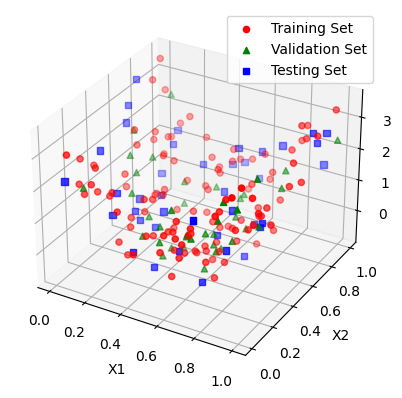

In [75]:
#Reading data from the CSV file
file_path = 'data_reg.csv'
data = pd.read_csv(file_path)

#Splitting the data into training, validation, and testing sets
train_set = data[:120]
validation_set = data[120:160]
test_set = data[160:]

#Plotting the 3D scatter plot
fig = plt.figure()
axes3d = fig.add_subplot(111, projection='3d')

axes3d.scatter(train_set['x1'], train_set['x2'], train_set['y'], c='r', marker='o', label='Training Set')
axes3d.scatter(validation_set['x1'], validation_set['x2'], validation_set['y'], c='g', marker='^', label='Validation Set')
axes3d.scatter(test_set['x1'], test_set['x2'], test_set['y'], c='b', marker='s', label='Testing Set')

axes3d.set_xlabel('X1')
axes3d.set_ylabel('X2')
axes3d.set_zlabel('Y')

axes3d.legend()
plt.show()


The code reads a 3D dataset from a CSV file called 'data_reg.csv' and visualizes it with a 3D scatter plot, distinguishing between training (red), validation (green), and testing (blue) sets.

2- Apply polynomial regression on the training set with degrees in the range of 1 to 10. Which polynomial degree is the best? Justify your answer by plotting the validation error vs polynomial degree curve. For each model plot the surface of the learned function alongside with the training examples on the same plot.
(hint: you can use PolynomialFeatures and LinearRegression from scikit-learn library)

Degree 1 - Validation MSE: 0.9118
Degree 2 - Validation MSE: 0.1799
Degree 3 - Validation MSE: 0.2024
Degree 4 - Validation MSE: 0.2327
Degree 5 - Validation MSE: 0.2300
Degree 6 - Validation MSE: 0.2254
Degree 7 - Validation MSE: 0.9890
Degree 8 - Validation MSE: 0.3731
Degree 9 - Validation MSE: 0.3404
Degree 10 - Validation MSE: 1.6775


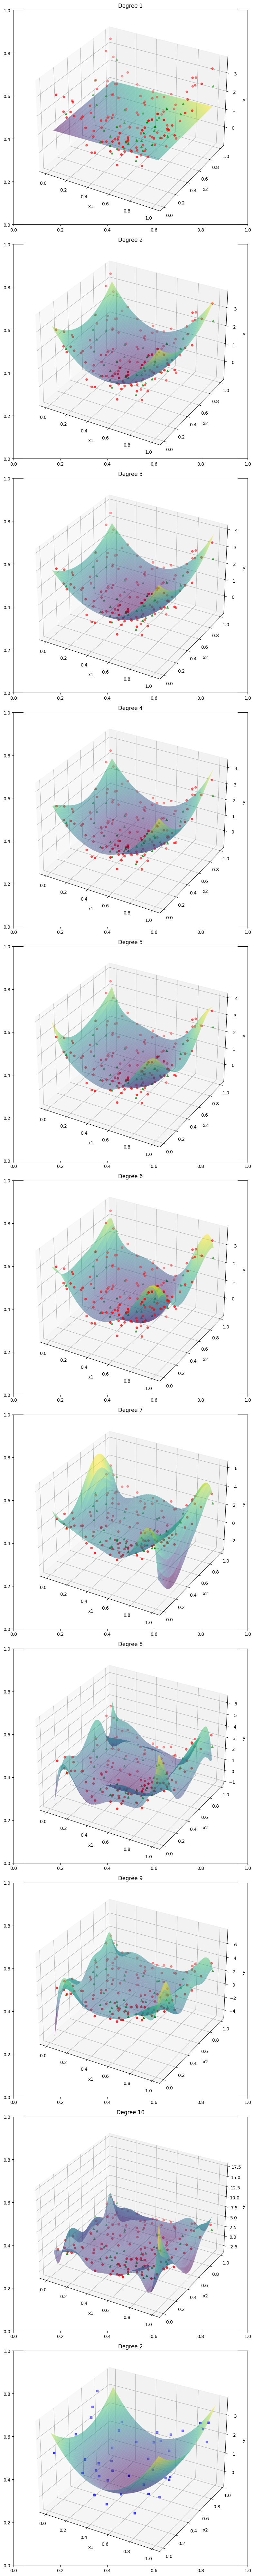

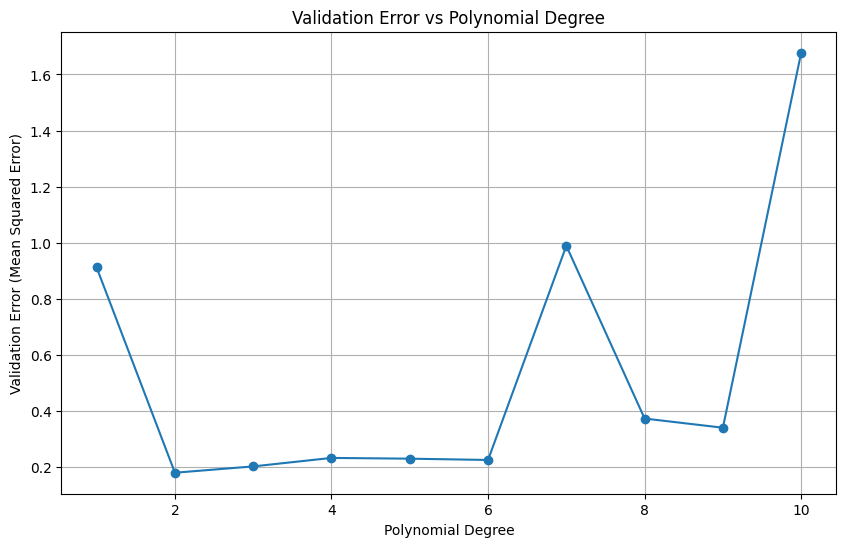

The best polynomial degree is: 2


In [73]:
X_train = train_set[['x1', 'x2']].values
y_train = train_set['y'].values.reshape(-1, 1)

X_val = validation_set[['x1', 'x2']].values
y_val = validation_set['y'].values.reshape(-1, 1)

degrees = range(1, 11)
validation_errors = []

fig, axes = plt.subplots(nrows=11, ncols=1, figsize=(8, 80))  # Increase the height of each subplot

best_xx = None
best_yy = None
best_zz = None
best_ax = None

for degree, ax in zip(degrees, axes.flatten()):
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_val_poly = poly_features.transform(X_val)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predictions on validation set
    y_val_pred = model.predict(X_val_poly)

    val_error = mean_squared_error(y_val, y_val_pred)
    validation_errors.append(val_error)

    ax = fig.add_subplot(11, 1, degree, projection='3d')
    ax.scatter(train_set['x1'], train_set['x2'], train_set['y'], c='r', marker='o', label='Training Set')
    ax.scatter(validation_set['x1'], validation_set['x2'], validation_set['y'], c='g', marker='^', label='Validation Set' )


    if validation_errors is None or val_error <= min(validation_errors):
      best_xx, best_yy = np.meshgrid(np.linspace(X_val[:, 0].min(), X_val[:, 0].max(), 100),
                         np.linspace(X_val[:, 1].min(), X_val[:, 1].max(), 100))
      best_zz = model.predict(poly_features.transform(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)

    xx, yy = np.meshgrid(np.linspace(X_val[:, 0].min(), X_val[:, 0].max(), 100),
                         np.linspace(X_val[:, 1].min(), X_val[:, 1].max(), 100))
    zz = model.predict(poly_features.transform(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)

    ax.plot_surface(xx, yy, zz, alpha=0.5, cmap='viridis', label=f'Degree {degree}')

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    ax.set_title(f'Degree {degree}')

    print(f'Degree {degree} - Validation MSE: {val_error:.4f}')

best_ax = fig.add_subplot(11, 1, 11, projection='3d')
best_ax.scatter(test_set['x1'], test_set['x2'], test_set['y'],c='b', marker='s', label='Testing Set')

best_ax.plot_surface(best_xx, best_yy, best_zz, alpha=0.5, cmap='viridis', label=f'Degree 2')

best_ax.set_xlabel('x1')
best_ax.set_ylabel('x2')
best_ax.set_zlabel('y')
best_ax.set_title(f'Degree 2')

plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(degrees, validation_errors, marker='o')
plt.title('Validation Error vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Validation Error (Mean Squared Error)')
plt.grid(True)
plt.show()

# Find the best polynomial degree based on the minimum validation error
best_degree = degrees[np.argmin(validation_errors)]
print(f"The best polynomial degree is: {best_degree}")


The code performs polynomial regression with degrees ranging from 1 to 10 using
training and validation data. For each degree, it plots the learned function surface and scatter plots of the training and validation sets in 3D. The validation error is also plotted against the polynomial degree. The key insight is that the best model, as indicated by the minimum validation error, occurs at degree 2 which is 0.1799. This degree strikes a balance between capturing the underlying patterns in the data and avoiding overfitting, as higher-degree polynomials may fit the noise in the training data too closely, leading to poor generalization. The 3D plots visually demonstrate how the model with degree 2 provides a smooth fit to the data without excessive complexity. Finally, the best model is applied to the testing set, and a 3D scatter plot is created to visualize how well the model generalizes to new, unseen data.



---



---


3- Apply ridge regression on the training set to fit a polynomial of degree 8. For the regularization parameter, choose the best value among the following options: {0.001, 0.005, 0.01, 0.1, 10}. Plot the MSE on the validation vs the regularization parameter.
(hint: you can use Ridge regression implementation from scikit-learn)

Regularization Parameter = 0.001: MSE = 0.2133
Regularization Parameter = 0.005: MSE = 0.2110
Regularization Parameter = 0.010: MSE = 0.2100
Regularization Parameter = 0.100: MSE = 0.2355
Regularization Parameter = 10.000: MSE = 0.5038


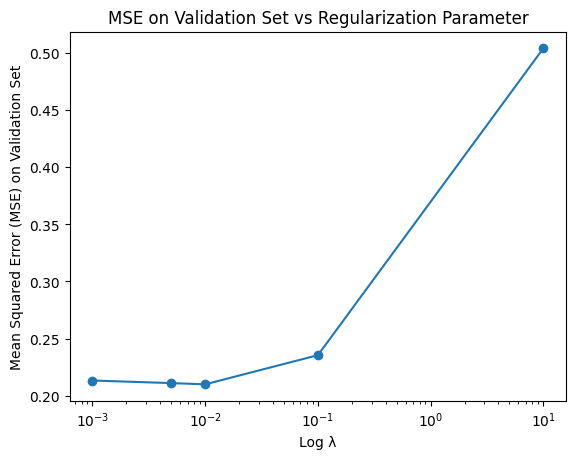

In [72]:
degree = 8

poly = PolynomialFeatures(degree=degree)
X_poly_train = poly.fit_transform(X_train)
X_poly_val = poly.transform(X_val)

regularization_parameters = [0.001, 0.005, 0.01, 0.1, 10]

mse_values = []

for regularization_parameter in regularization_parameters:

    model = Ridge(alpha=regularization_parameter)

    # Fit the model on the training set
    model.fit(X_poly_train, y_train)

    # Predict on the validation set
    y_val_pred = model.predict(X_poly_val)

    # Calculate Mean Squared Error on the validation set
    mse = mean_squared_error(y_val, y_val_pred)
    mse_values.append(mse)

for alpha, mse in zip(regularization_parameters, mse_values):
    print(f"Regularization Parameter = {alpha:.3f}: MSE = {mse:.4f}")

plt.plot(regularization_parameters, mse_values, marker='o')
plt.xscale('log')
plt.title('MSE on Validation Set vs Regularization Parameter')
plt.xlabel('Log λ')
plt.ylabel('Mean Squared Error (MSE) on Validation Set')
plt.show()



In this code, a Ridge regression model is trained with different regularization parameters, and the Mean Squared Error (MSE) is calculated on the validation set for each parameter. The Ridge regularization term, λR(w) "R(w) in our case is the sqaured of the L2 norm", is crucial in preventing overfitting. When the regularization parameter (λ) approaches 0, the regularization term becomes negligible, and the model tends to minimize only the MSE of the training data, which may lead to overfitting. Conversely, as λ approaches infinity, the impact of the MSE term diminishes, and the model may underfit by overly relying on the regularization term. The objective is to find the optimal λ that strikes a balance between fitting the training data well and avoiding overfitting. The regularization term ensures that the coefficients (**w**) are regularized, preventing them from becoming excessively large during training. In this specific case, a λ value of 0.01 is identified as the best regularization parameter, as it yields the lowest MSE on the validation set, indicating a favorable compromise between fitting and regularization.

# **Logistic Regression**



The train_cls.csv file contains a set of training examples for a binary classification problem, and the testing examples are provided in the test_cls.csv file. The following figures show these examples.

1.using the logistic regression implementation of scikit-learn library, Learn a logistic regression model with a linear decision boundary. Draw the decision boundary of the learned model on a scatterplot of the training set (similar to Figure 1). Compute the training and testing accuracy of the learned model.

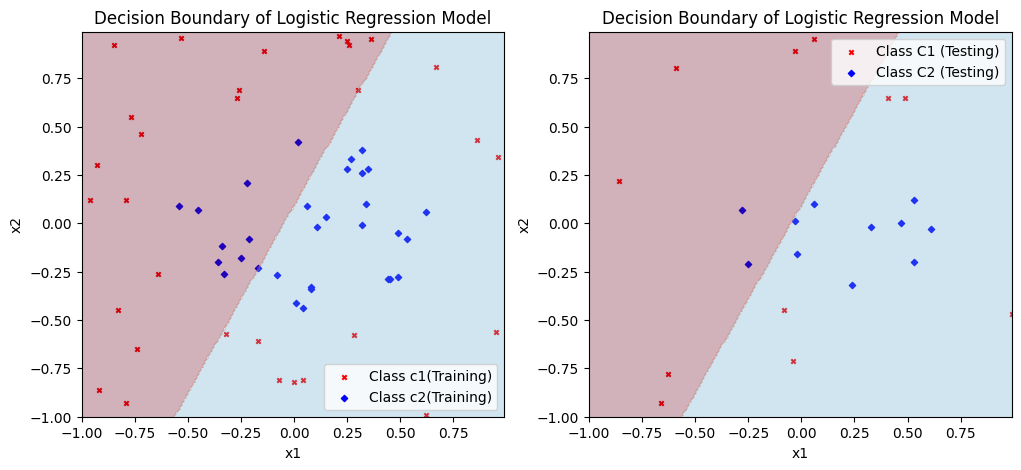

Training Accuracy: 0.6612903225806451
Testing Accuracy: 0.6818181818181818


In [79]:
train_data = pd.read_csv('train_cls.csv')
test_data = pd.read_csv('test_cls.csv')

train_data['class'] = train_data['class'].map({'C1': 0, 'C2': 1})
test_data['class'] = test_data['class'].map({'C1': 0, 'C2': 1})

X_train = train_data[['x1', 'x2']].values
y_train = train_data['class'].values

X_test = test_data[['x1', 'x2']].values
y_test = test_data['class'].values

model = LogisticRegression()
model.fit(X_train, y_train)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], label='Class c1(Training)', marker='x', c='red', s=10)
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], label='Class c2(Training)', marker='D', c='blue', s=10)

x_min, x_max = -1, 1
y_min, y_max = -1, 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_custom = plt.cm.RdBu
plt.contourf(xx, yy, Z, cmap=cmap_custom, alpha=0.3, levels=np.linspace(0, 1, 3), extend='both')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundary of Logistic Regression Model')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], label='Class C1 (Testing)', marker='x', c='red', s=10)
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], label='Class C2 (Testing)', marker='D', c='blue', s=10)
plt.contourf(xx, yy, Z, cmap=cmap_custom, alpha=0.3, levels=np.linspace(0, 1, 3), extend='both')
plt.title('Decision Boundary of Logistic Regression Model')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

# Compute training accuracy
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

# Compute testing accuracy
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy}")


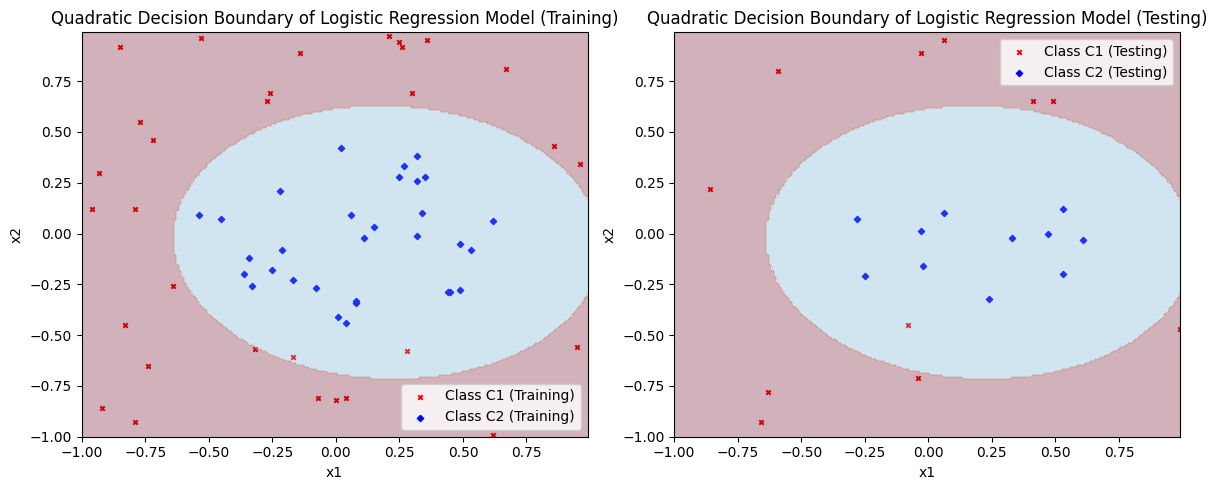

Training Accuracy: 0.967741935483871
Testing Accuracy: 0.9545454545454546


In [86]:
# Apply quadratic transformation to features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LogisticRegression()
model.fit(X_train_poly, y_train)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], label='Class C1 (Training)', marker='x', c='red', s=10)
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], label='Class C2 (Training)', marker='D', c='blue', s=10)

x_min, x_max = -1, 1
y_min, y_max = -1, 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))

Z = Z.astype(float)
Z = Z.reshape(xx.shape)
cmap_custom = plt.cm.RdBu
plt.contourf(xx, yy, Z, cmap=cmap_custom, alpha=0.3, levels=np.linspace(0, 1, 3), extend='both')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Quadratic Decision Boundary of Logistic Regression Model (Training)')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], label='Class C1 (Testing)', marker='x', c='red', s=10)
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], label='Class C2 (Testing)', marker='D', c='blue', s=10)
plt.contourf(xx, yy, Z, cmap=cmap_custom, alpha=0.3, levels=np.linspace(0, 1, 3), extend='both')

plt.title('Quadratic Decision Boundary of Logistic Regression Model (Testing)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

plt.tight_layout()
plt.show()

# Compute training accuracy
y_train_pred = model.predict(X_train_poly)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

# Compute testing accuracy
y_test_pred = model.predict(X_test_poly)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy}")


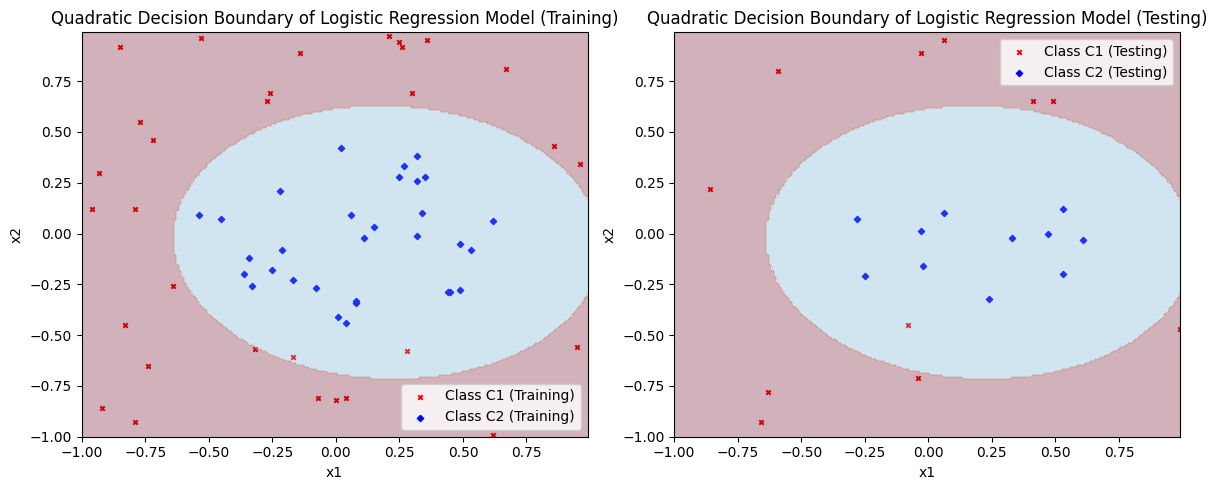

Training Accuracy: 0.967741935483871
Testing Accuracy: 0.9545454545454546


In [85]:
# Apply quadratic transformation to features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LogisticRegression()
model.fit(X_train_poly, y_train)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], label='Class C1 (Training)', marker='x', c='red', s=10)
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], label='Class C2 (Training)', marker='D', c='blue', s=10)

x_min, x_max = -1, 1
y_min, y_max = -1, 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))

Z = Z.astype(float)
Z = Z.reshape(xx.shape)
cmap_custom = plt.cm.RdBu
plt.contourf(xx, yy, Z, cmap=cmap_custom, alpha=0.3, levels=np.linspace(0, 1, 3), extend='both')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Quadratic Decision Boundary of Logistic Regression Model (Training)')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], label='Class C1 (Testing)', marker='x', c='red', s=10)
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], label='Class C2 (Testing)', marker='D', c='blue', s=10)
plt.contourf(xx, yy, Z, cmap=cmap_custom, alpha=0.3, levels=np.linspace(0, 1, 3), extend='both')

plt.title('Quadratic Decision Boundary of Logistic Regression Model (Testing)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

plt.tight_layout()
plt.show()

# Compute training accuracy
y_train_pred = model.predict(X_train_poly)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

# Compute testing accuracy
y_test_pred = model.predict(X_test_poly)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy}")

3.Comment on the learned models in 1 and 2 in terms of overfitting/underfitting


---



---


In the first logistic regression model with a linear decision boundary, the training accuracy is 66.13%, while the testing accuracy is 68.18%, both are low.
It is obvious from the figures in question 2 part 1 that The model is too simple and the decision boundary struggles to capture the underlying patterns in the data.

In the other hand, the quadratic model has significantly higher accuracy on both the training and testing sets compared to the linear model this means that the model generalizes well to new data as shown in question 2 part 2. Also the decision boundary is more flexible, capturing the non-linear patterns in the data.

When you use higher-degree polynomials in logistic regression, the model becomes more complex. This complexity allows the model to closely follow the training data, capturing all the details and variations. While this might make the model perform really well on the training data, it could struggle when faced with new, unseen data. This is because it may have learned the training data too precisely, including its noise and fluctuations, this what called overfitting.

It is also obvious that when the polynomial degree is increased to 12, the training accuracy drops to 93.5%, and the testing accuracy decreases to 86.4%.
This indicates that the model with a degree of 2 generalizes well to unseen data, as both training and testing accuracies are high. However, when the degree is increased to 12, the model starts to overfit the training data, resulting in a lower testing accuracy. The decrease in testing accuracy suggests that the model becomes too complex and captures noise in the training data, leading to poorer performance on new data.